In [1]:
# Operating System functionality, especially for traversing directory structures
import os
# Specialized container datatypes, i.e. specialized versions of lists, dictionaries, etc.
import collections as coll
# Date and time functions, useful for timestamping file names of figures.
import datetime
# Functional programming tools.
import itertools as itt
# Pretty-printing text by wrapping and filling lines.
import textwrap as tw

# Well-known package for n-dimensional arrays, numerical functions, linear algebra, etc.
import numpy as np
# Data analysis package.
import pandas as pd
# "Default" plotting package of Python.
import matplotlib as mpl
import matplotlib.pyplot as plt
# Matplotlib colours module.
import matplotlib.colors as mpcol
# Package improving Matplotlib's default plot style.
import seaborn as sns

import pickle

# Single Cell Analysis in Python
import scanpy as sc
import anndata as ad


//anaconda3/envs/robin_pyscenic/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
//anaconda3/envs/robin_pyscenic/lib/python3.6/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [16]:
#DATA_FOLDER = "D:/Robin/simulated-nuclei/only_MT_markers"
DATA_FOLDER = '../../simulated-nuclei_data/OB_pyscenic/filtered_regulons_185/TFs_over_4'
#sim_nuclei_fname = os.path.join(DATA_FOLDER,'simulated_auc.h5ad')
sim_ex_mtx_fname = os.path.join(DATA_FOLDER,'sim_ex_mtx.p')
sim_table_fname = os.path.join(DATA_FOLDER,'sim_id_table.p')

# Reading in data

In [17]:
sim_ex_mtx = pickle.load(open(sim_ex_mtx_fname,'rb'))

In [18]:
sim_table = pickle.load(open(sim_table_fname,'rb'))

In [19]:
sim_table

general_dataset specific_dataset
0                PCX            PCX_1
1                PCX            PCX_1
2                PCX            PCX_1
3                PCX            PCX_1
4                PCX            PCX_1
...              ...              ...
2995             AON            AON_3
2996             AON            AON_3
2997             AON            AON_3
2998             AON            AON_3
2999             AON            AON_3

[3000 rows x 2 columns]

In [7]:
#sim_ex_mtx = sim_ex_mtx.clip(lower=0.1) #in case all the zeroes are causing issues

In [20]:
data = sc.AnnData(sim_ex_mtx)

Transforming to str index.


In [21]:
data.obs['general dataset'] = list(sim_table['general_dataset'])
data.obs['specific dataset'] = list(sim_table['specific_dataset'])

In [22]:
data.obs

general dataset specific dataset
0                PCX            PCX_1
1                PCX            PCX_1
2                PCX            PCX_1
3                PCX            PCX_1
4                PCX            PCX_1
...              ...              ...
2995             AON            AON_3
2996             AON            AON_3
2997             AON            AON_3
2998             AON            AON_3
2999             AON            AON_3

[3000 rows x 2 columns]

# Clustering

In [23]:
%run ../../pyscenic/Code/scanpy_aid.py

In [24]:
# data = regress_and_scale(data)
sc.pp.scale(data)


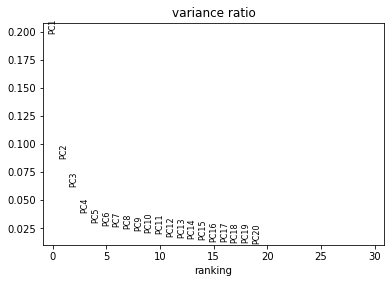

In [25]:
#sc.tl.pca(data, svd_solver='arpack', n_comps=40)
sc.tl.pca(data,svd_solver='auto',n_comps=20)
sc.pl.pca_variance_ratio(data, log=False, save=True)


... storing 'general dataset' as categorical
... storing 'specific dataset' as categorical


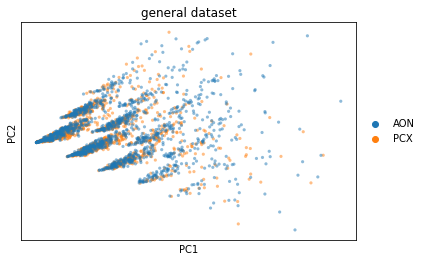

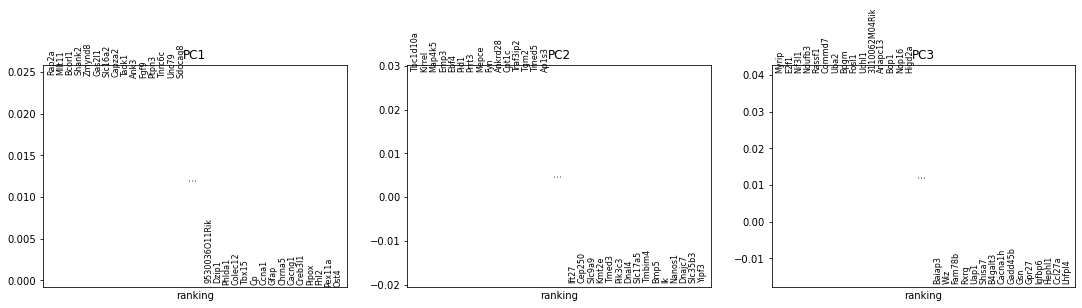

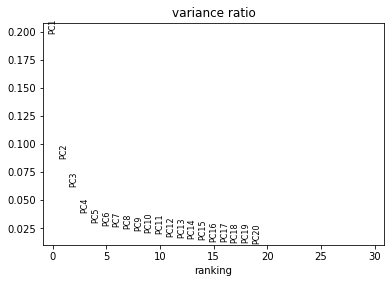

In [26]:
sc.pl.pca_overview(data, color = "general dataset", **{'alpha':0.5})

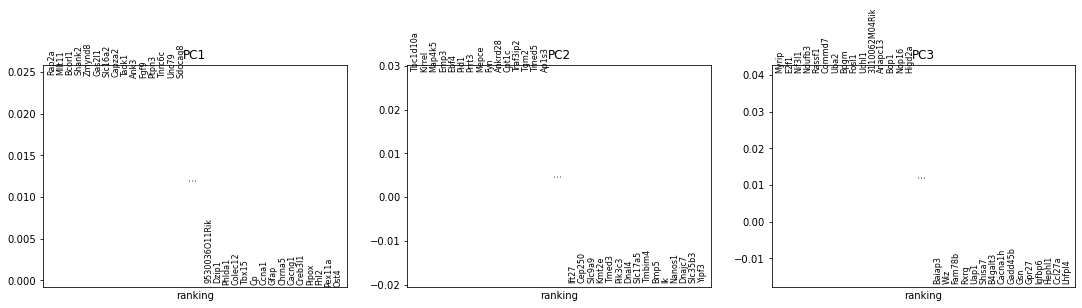

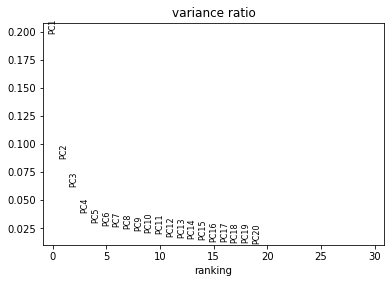

In [27]:
sc.pl.pca_overview(data, color = "general dataset", save = 'generic', **{'alpha':0.5})

In [19]:
#Getting top regulons for PC1

df_loadings = pd.DataFrame(data.varm['PCs'], index=data.var_names)
# get rank of each loading for each PC
df_rankings = pd.DataFrame((-1 * df_loadings.values).argsort(0).argsort(0), index=df_loadings.index, columns=df_loadings.columns)
# c.f. with df_loadings.apply(scipy.stats.rankdata, axis=0)
# evaluate 
print("Top loadings for PC1...")
print(df_loadings[0].sort_values(ascending=False))

Top loadings for PC1...
Hpcal4      0.031934
Camk2a      0.031934
Irs2        0.031934
Myo16       0.031934
Timm17a     0.031934
              ...   
Atad2      -0.000000
Hist1h1b   -0.000000
Slc27a3    -0.000000
Smc2       -0.000000
Pnpla6     -0.000000
Name: 0, Length: 3746, dtype: float32


In [ ]:
df_loadings

In [21]:
df_loadings.to_pickle(os.path.join(DATA_FOLDER,'PC_variances.p'))

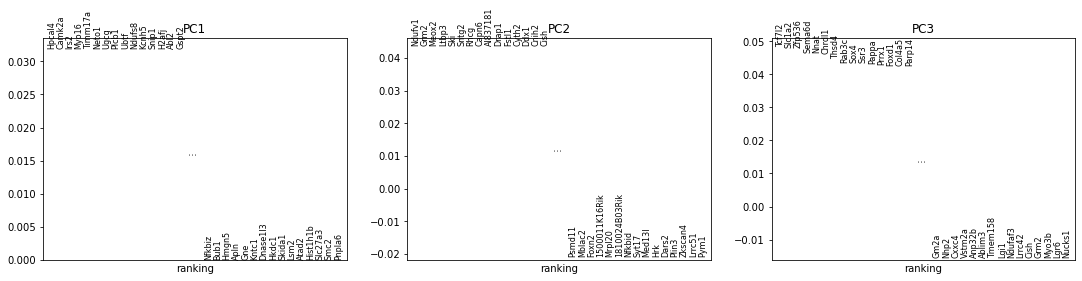

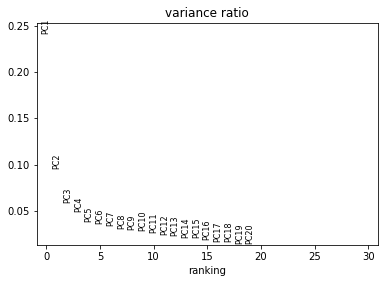

In [17]:
sc.pl.pca_overview(data, color = "general dataset", 
                   components = ['1,2','3,4','5,6','7,8','9,10','11,12','13,14','15,16','17,18','19,20'],#,'21,22','23,24','25,26','27,28','29,30'],
                  save = 'generic' 
                  )

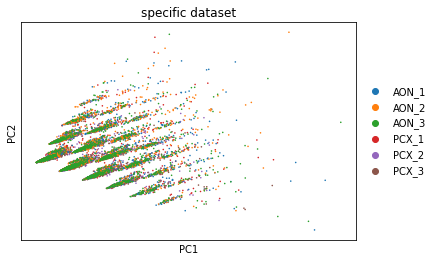

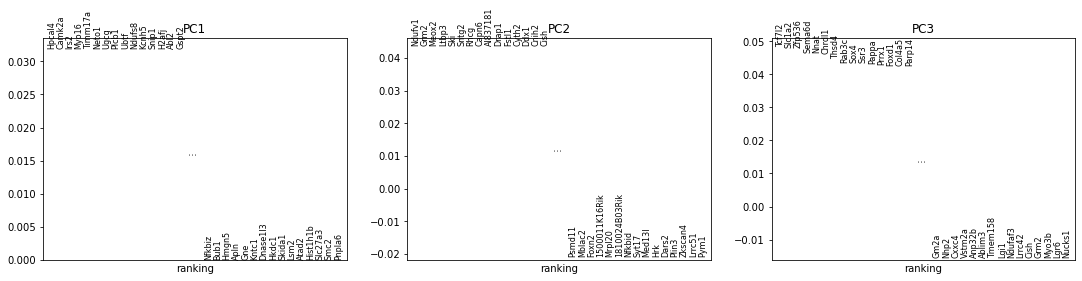

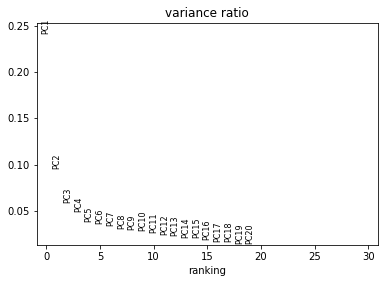

In [22]:
sc.pl.pca_overview(data, color = "specific dataset")

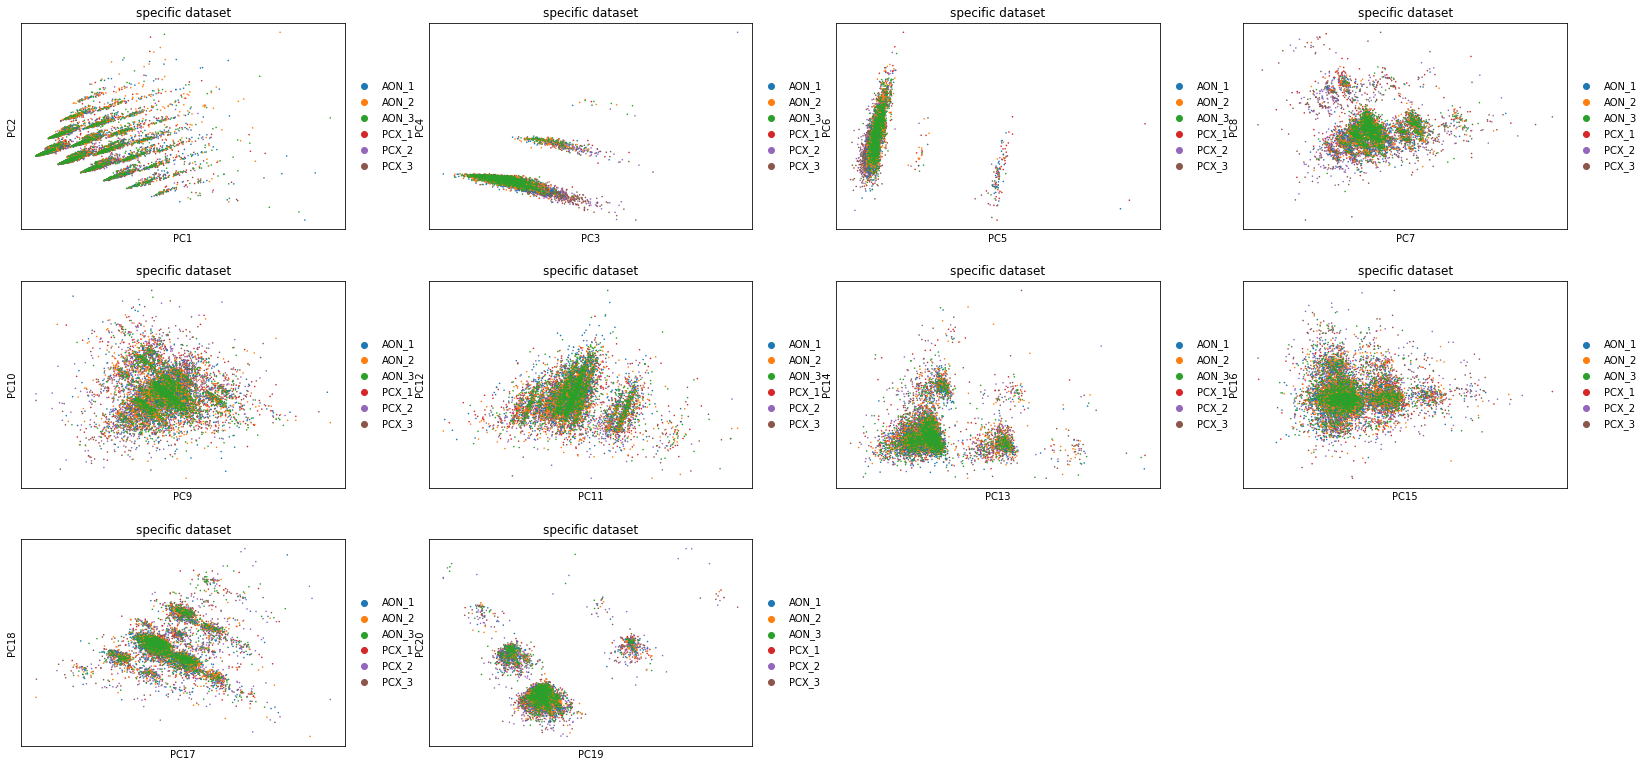

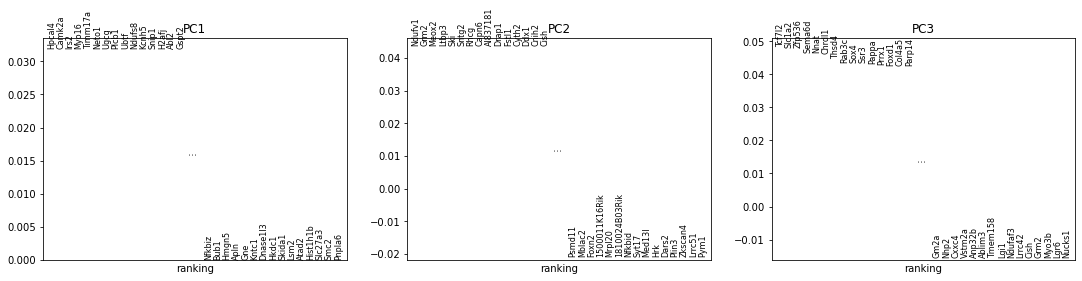

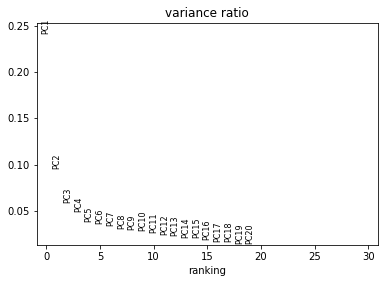

In [24]:
sc.pl.pca_overview(data, color = "specific dataset", components = 
                   ['1,2','3,4','5,6','7,8','9,10','11,12','13,14','15,16','17,18','19,20'],#'21,22','23,24','25,26','27,28','29,30'],
                   #save = '_specific_20pcs'
                  )
                  

//anaconda3/envs/robin_pyscenic/lib/python3.6/site-packages/umap/spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets
//anaconda3/envs/robin_pyscenic/lib/python3.6/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11000. The TBB threading layer is disabled.
  warnings.warn(problem)


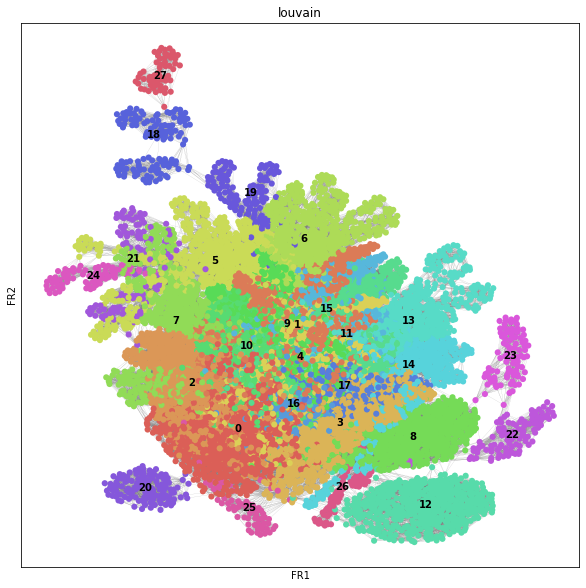

In [25]:
pcs_used, nbs, seed = 20, 20, 6
data, fig, ax = calc_and_plot_graph(data, pcs_used, nbs, seed);
#fig.savefig(os.path.join(DATA_FOLDER,'pca_clustering.png'))

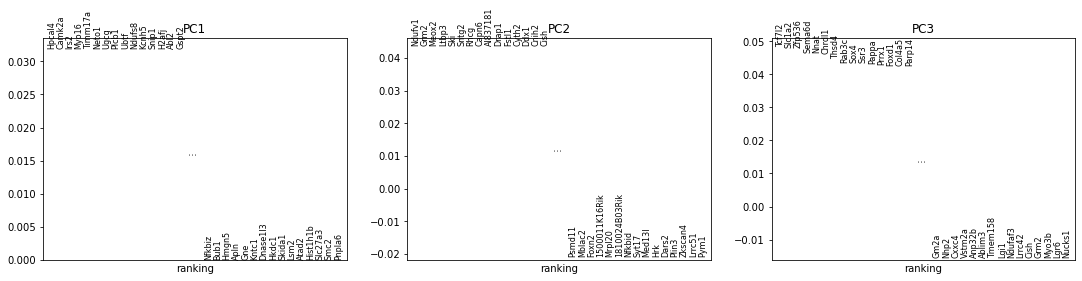

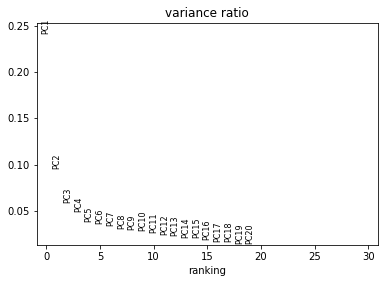

In [28]:
sc.pl.pca_overview(data, color = "louvain"
                   
                   ,save="louvain"
                  )

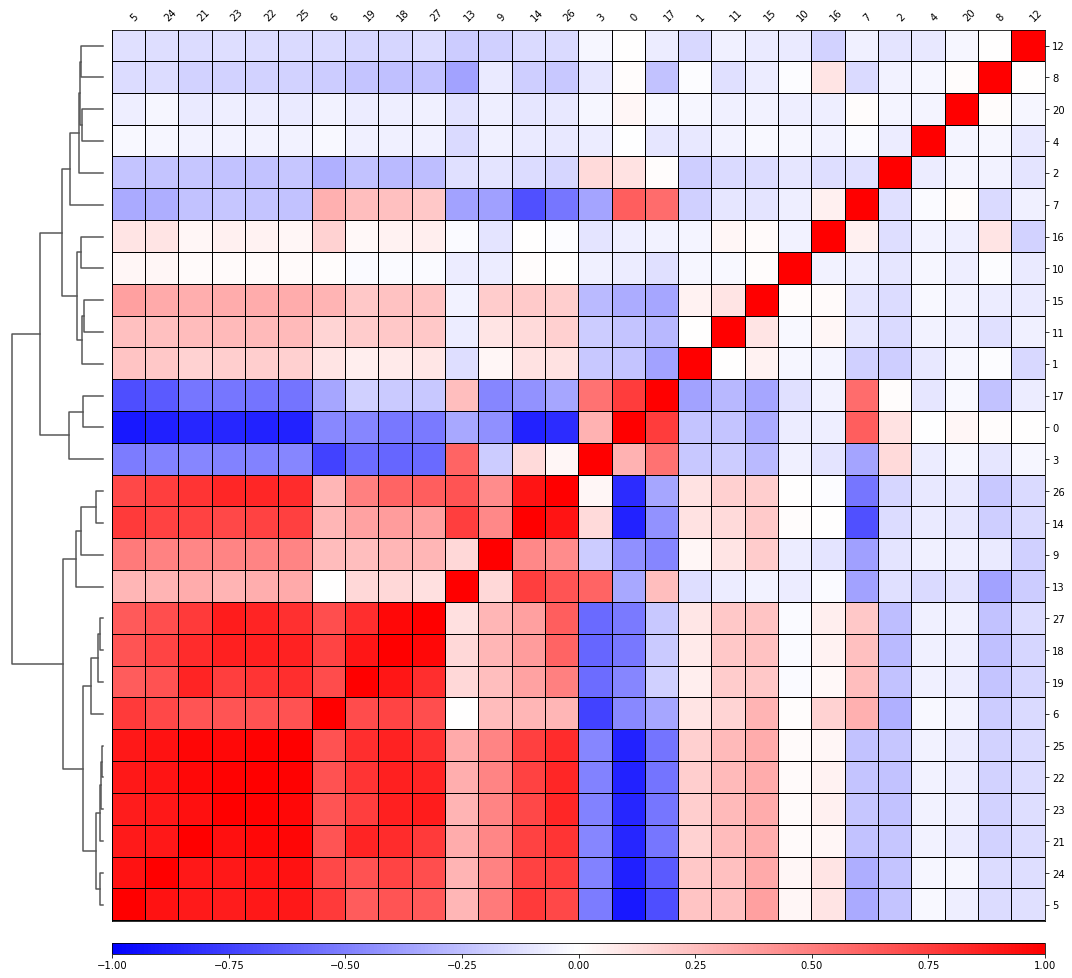

In [29]:
ax = sc.pl.correlation_matrix(data, 'louvain', save='correlations.png') 

In [36]:
def plot_expression_on_graph(data, genenames, columns=3): 
    """
    Given a list of genes, plot in n columns the graph clusters with gene expression mapped onto them. If raw is True, expression values before normalization, scaling etc. are used.
    This function has been modified so that it uses gene expression from the single cell matrix insted of the pyscenic regulon matrix
    """
    tmp = [x for x in genenames if x in single_cell_data.var_names]
    #store singel cell expression
    for gene in tmp:   
        data.obs[gene] = np.sum(single_cell_data[:, [gene,gene]].X, axis=1)
    
    for i in range(0, len(tmp), columns):
        sc.pl.umap(data, color=tmp[i:(i+columns)])
       

    not_present = [x for x in genenames if x not in single_cell_data.var_names]  # Report if gene not found
    if not_present:
        print("Not present:", not_present)

In [30]:
sc.tl.umap(data)

In [31]:
def color_umap(adata, color_parameter, fname = None):
    if fname is None:
        sc.pl.umap(adata, color=color_parameter)
    else:
        sc.pl.umap(adata, color=color_parameter, save=fname)

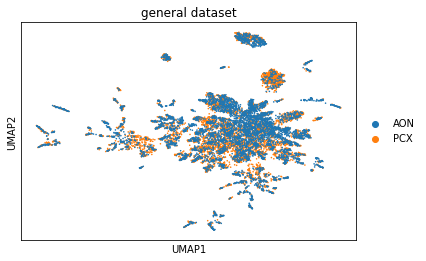

In [33]:
color_umap(data, "general dataset"
           ,'general_umap.png'
          )

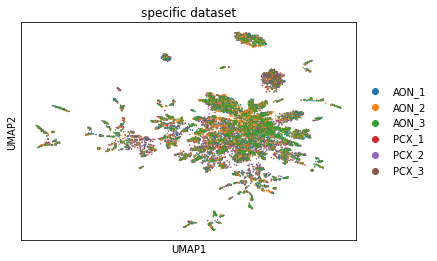

In [34]:
color_umap(data, "specific dataset",'simulated_specific_umap.png')

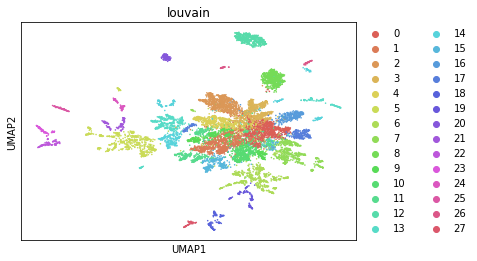

In [35]:
color_umap(data, "louvain",'simulated_louvain_umap.png')

In [36]:
sim_table['louvain'] = list(data.obs['louvain'])

In [37]:
sim_table.to_pickle(sim_table_fname)

### Table for Sharing Standardized Clusters

In [13]:
CLUSTER_TABLE_FNAME = os.path.join(DATA_FOLDER,'original_simulated_cluster_table.p')

In [14]:
sc.tl.umap(data) #if encournter an error, run this line - it will unfortnately re-compute your UMAP
umap0 = []
umap1 = []
for i in data.obsm['X_umap']:
    umap0.append(i[0])
    umap1.append(i[1])
table_data = {'UMAP_1': umap0, 'UMAP_2': umap1, 'louvain': data.obs['louvain'].to_list(), 'specific dataset': data.obs['specific dataset'].to_list(), 'general dataset': data.obs['general dataset'].to_list()}
table_for_stefan = pd.DataFrame(table_data)
table_for_stefan.index = data.obs.index
table_for_stefan.to_pickle(CLUSTER_TABLE_FNAME)